In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [3]:
df = pd.read_csv("bank-full.csv", delimiter=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.rename(columns={"y":"deposit"},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


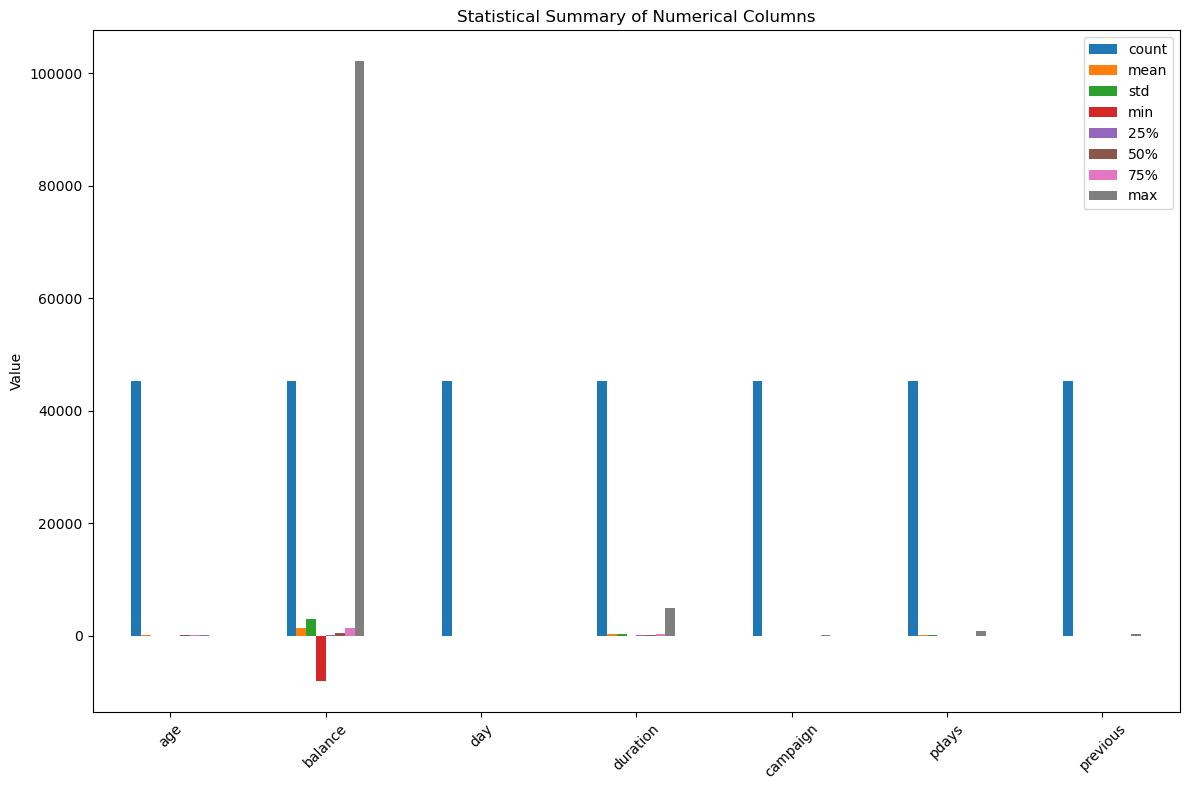

In [8]:
desc = df.describe()
desc.T.plot(kind='bar', figsize=(12, 8), legend=True)
plt.title('Statistical Summary of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

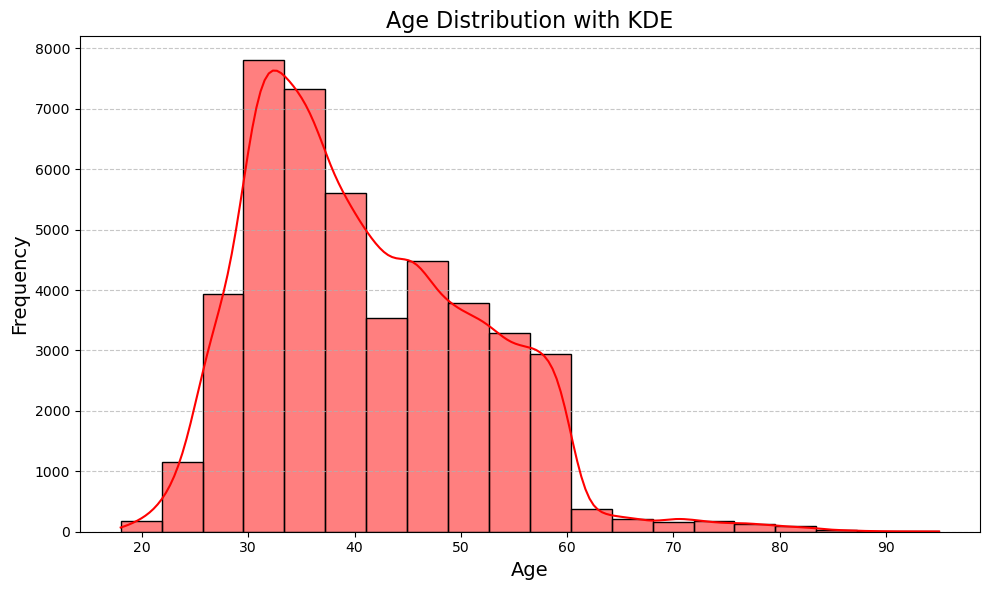

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], kde=True, color='red', bins=20, edgecolor='black')
plt.title('Age Distribution with KDE', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

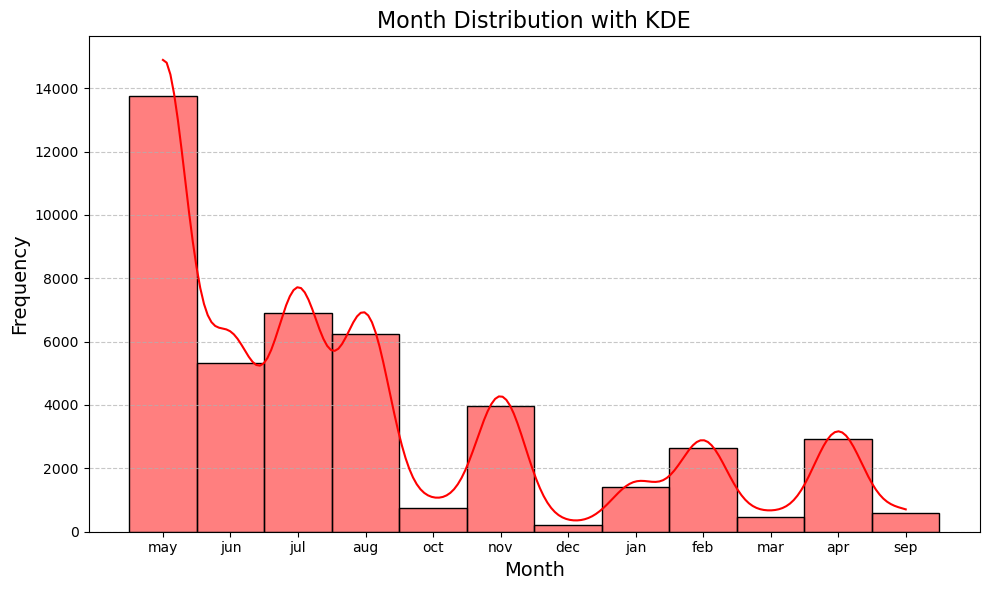

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df["month"], kde=True, color='red', bins=20, edgecolor='black')
plt.title('Month Distribution with KDE', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

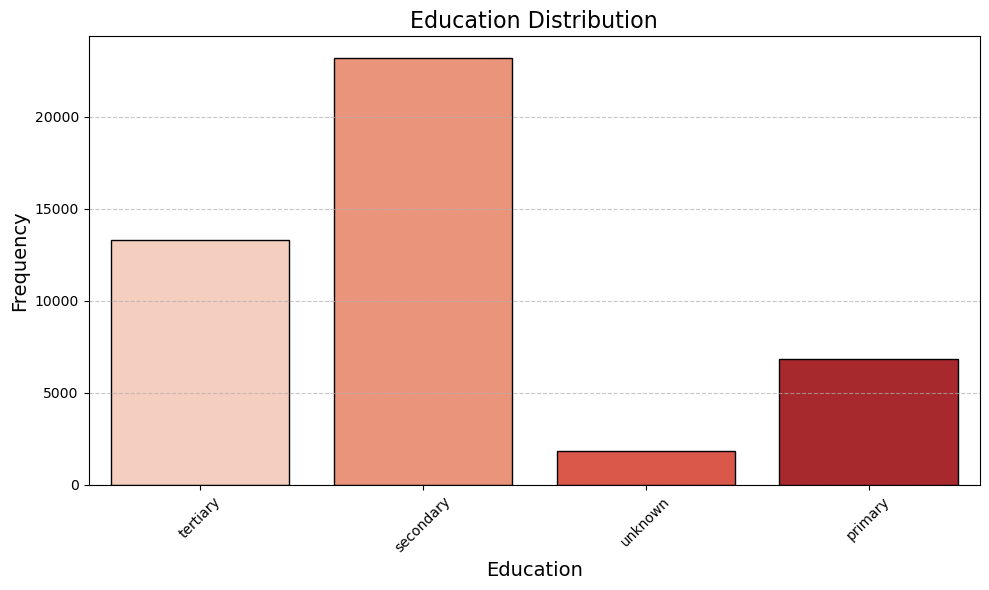

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', palette='Reds', edgecolor='black')
plt.title('Education Distribution', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

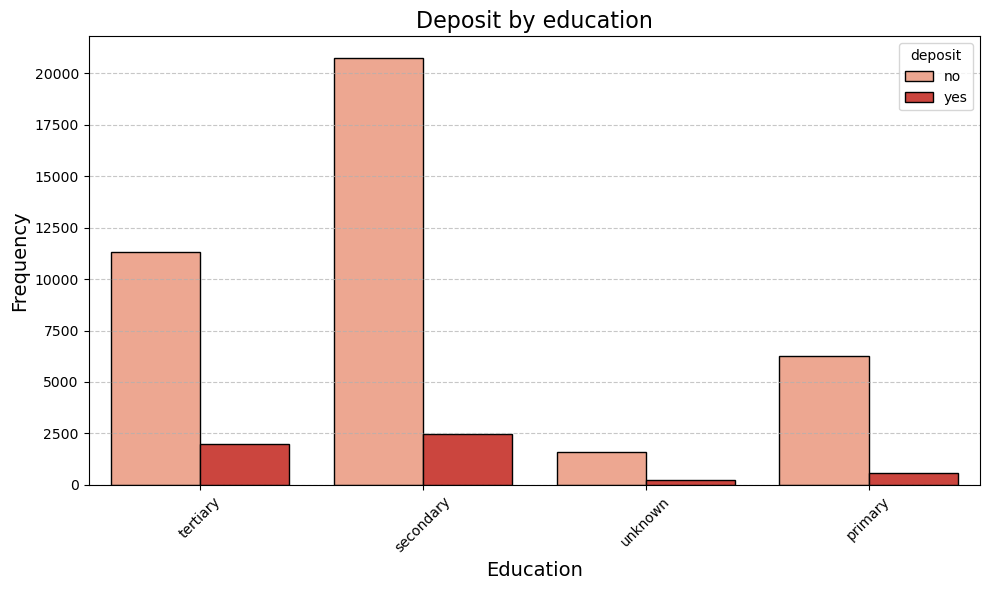

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='education', hue='deposit', palette='Reds', edgecolor='black')
plt.title('Deposit by education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

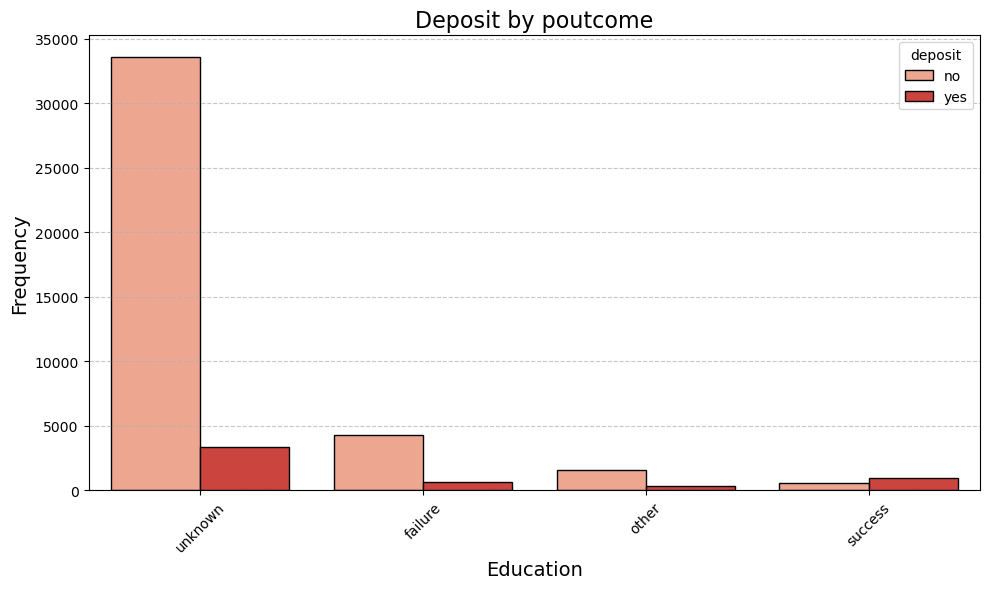

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='poutcome', hue='deposit', palette='Reds', edgecolor='black')
plt.title('Deposit by poutcome', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

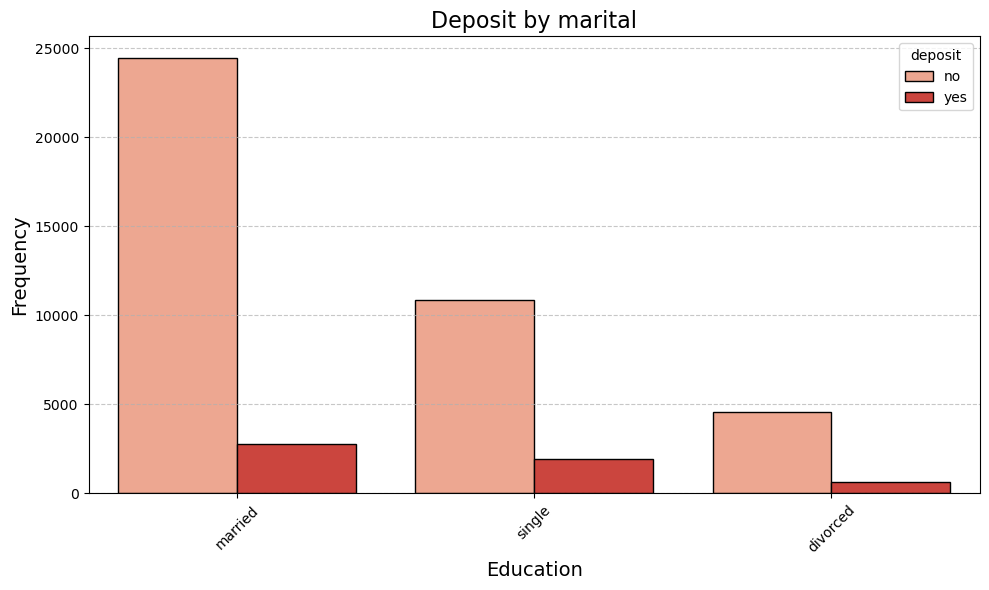

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='marital', hue='deposit', palette='Reds', edgecolor='black')
plt.title('Deposit by marital', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

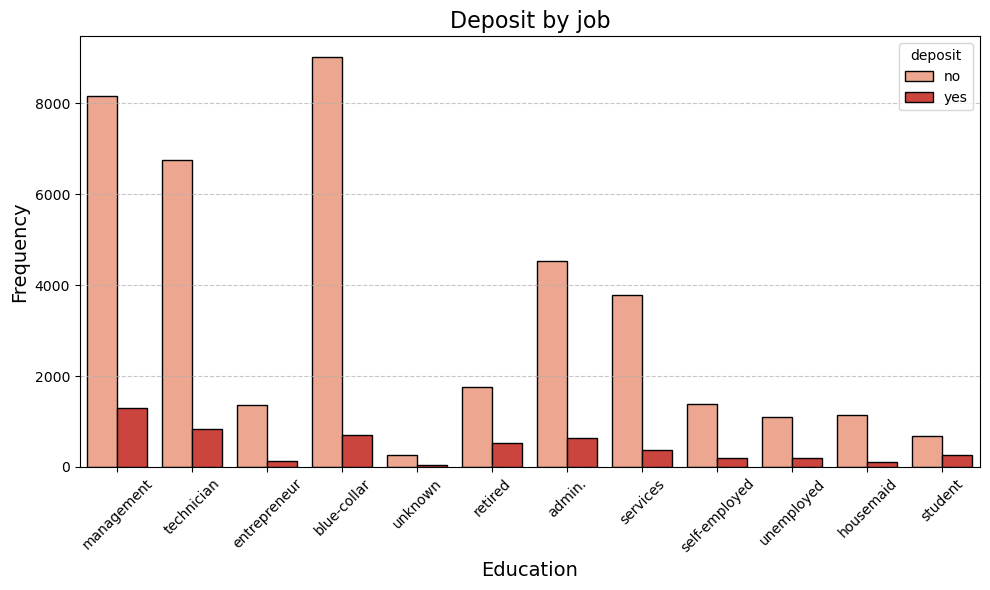

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='job', hue='deposit', palette='Reds', edgecolor='black')
plt.title('Deposit by job', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [16]:
columns_to_convert = ["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"]
for col in columns_to_convert:
    df[col] = df[col].astype("category").cat.codes.astype("int")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  deposit    45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


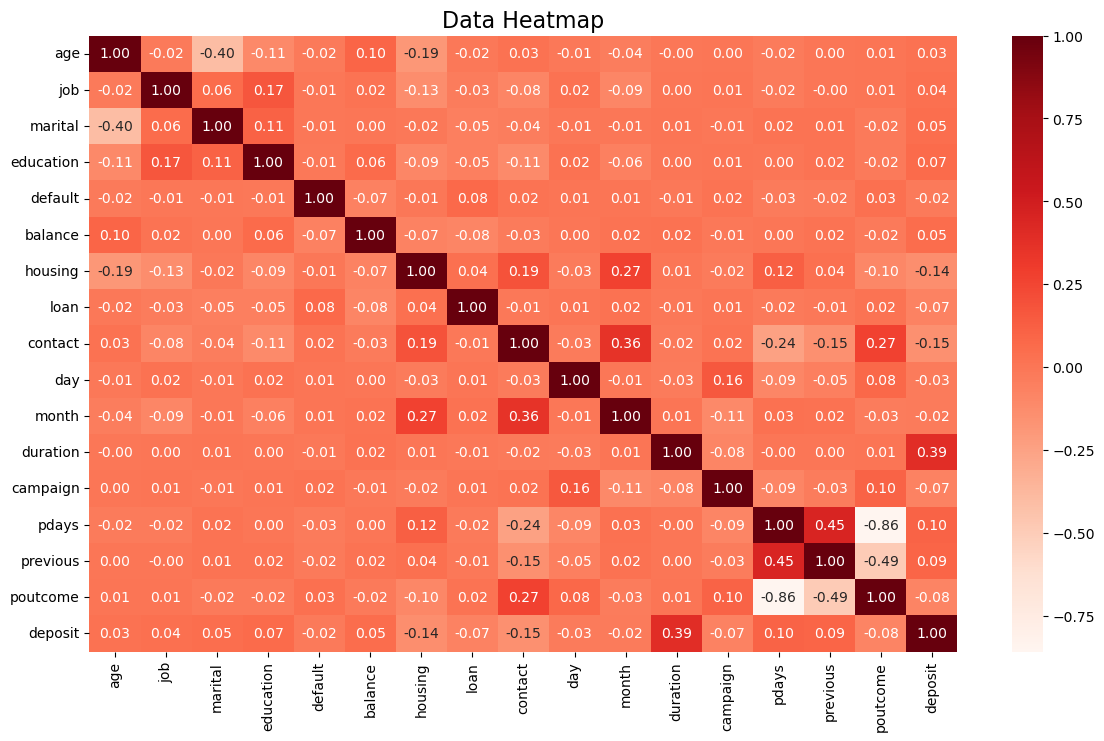

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Reds')
plt.title("Data Heatmap", fontsize=16)
plt.show()

In [19]:
x = df.drop(columns=["deposit"])
y = df["deposit"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=48)

In [20]:
DTC = DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_split=10)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [21]:
train_score= DTC.score(x_train,y_train)
test_score=DTC.score(x_test,y_test)
print("Train_score : ",train_score)
print("Test_score : ",test_score)

Train_score :  0.8923436660662938
Test_score :  0.8886759068121498


In [22]:
y_pred = DTC.predict(x_test)

In [23]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.8886759068121498


In [24]:
DTC.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02762995, 0.        ,
       0.16578836, 0.71021083, 0.        , 0.09637086, 0.        ,
       0.        ])

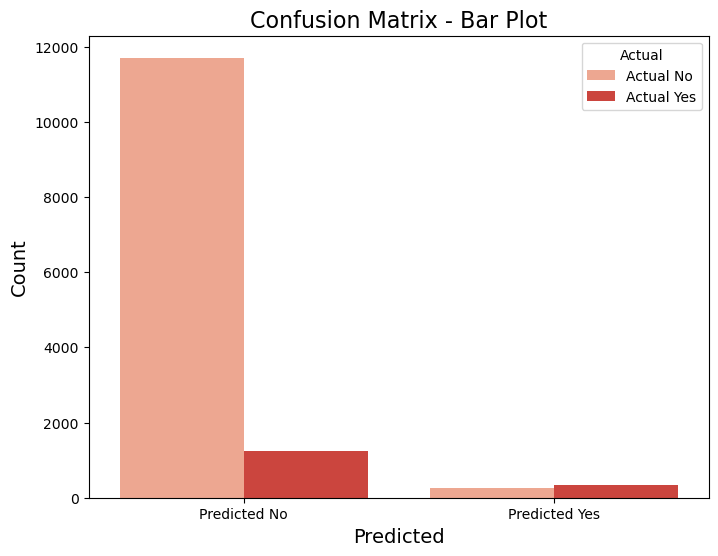

In [25]:
CM = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(CM, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
cm_values = cm_df.stack().reset_index()
cm_values.columns = ['Actual', 'Predicted', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Predicted', y='Count', hue='Actual', data=cm_values, palette='Reds')
plt.title('Confusion Matrix - Bar Plot', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

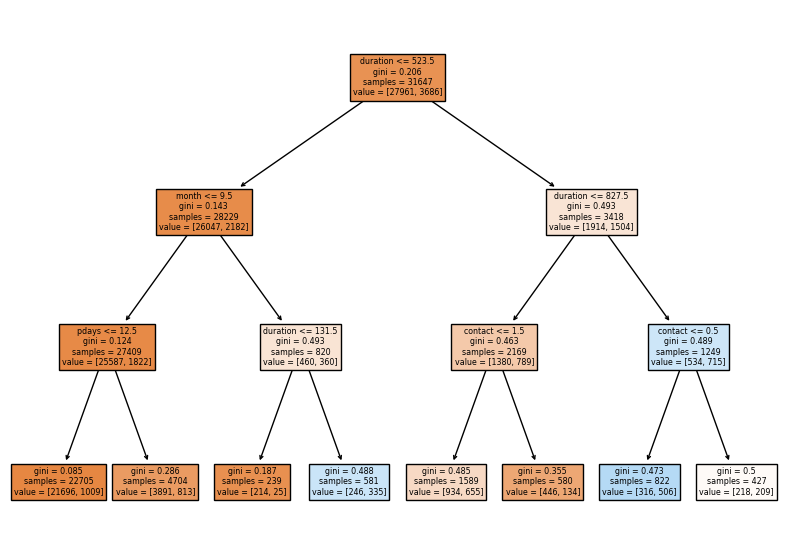

In [26]:
# tree_model = DecisionTreeClassifier(random_state=42)
# tree_model.fit(x_train, y_train)
# plt.figure(figsize=(20, 10))
# plot_tree(tree_model, filled=True, feature_names=x.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
# plt.title('Decision Tree for Predicting Customer Deposit', fontsize=16)

# plt.show()

plt.figure(figsize=(10,7))
plot_tree(DTC,filled= True , feature_names=x_train.columns.tolist())
plt.show()

In [27]:
accuracy = DTC.score(x_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 88.87%


### Model Accuracy : 87% ✅